# Outlier Analysis 

In [1]:
dat <- ggplot2::mpg
summary(dat$hwy)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   18.00   24.00   23.44   27.00   44.00 

In [14]:
min(dat$hwy)

[1] 12

In [15]:
max(dat$hwy)

[1] 44

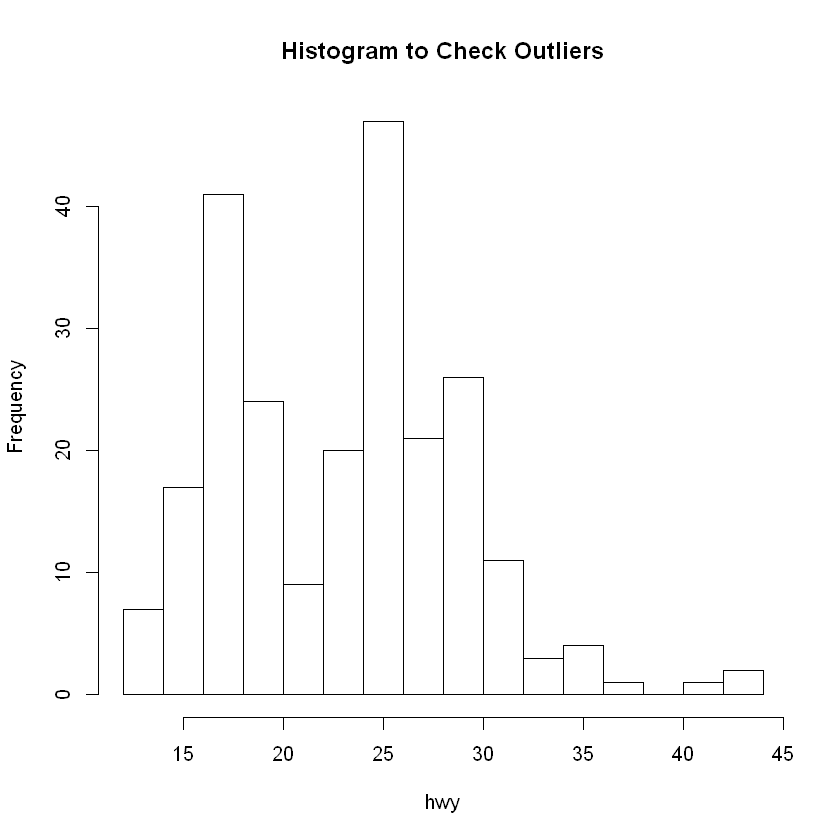

In [16]:
hist(dat$hwy,
    xlab = "hwy",
    main = "Histogram to Check Outliers",
    breaks = sqrt(nrow(dat)))

Using R base (with the number of bins corresponding to the square root of the number of observations in order to have more bins than the default option)

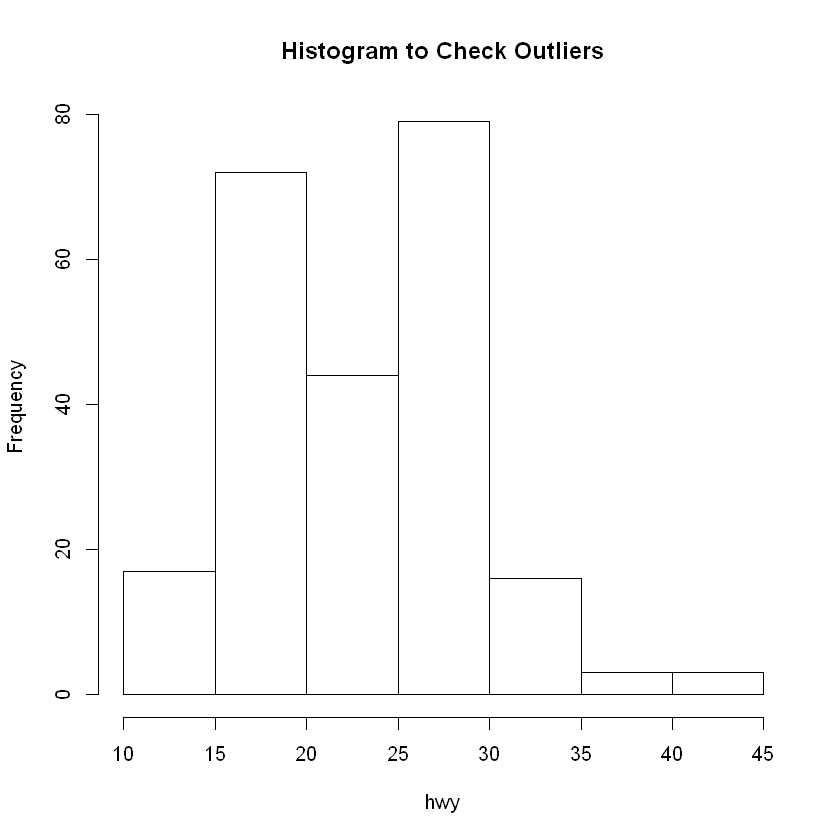

In [17]:
hist(dat$hwy,
    xlab = "hwy",
    main = "Histogram to Check Outliers")

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

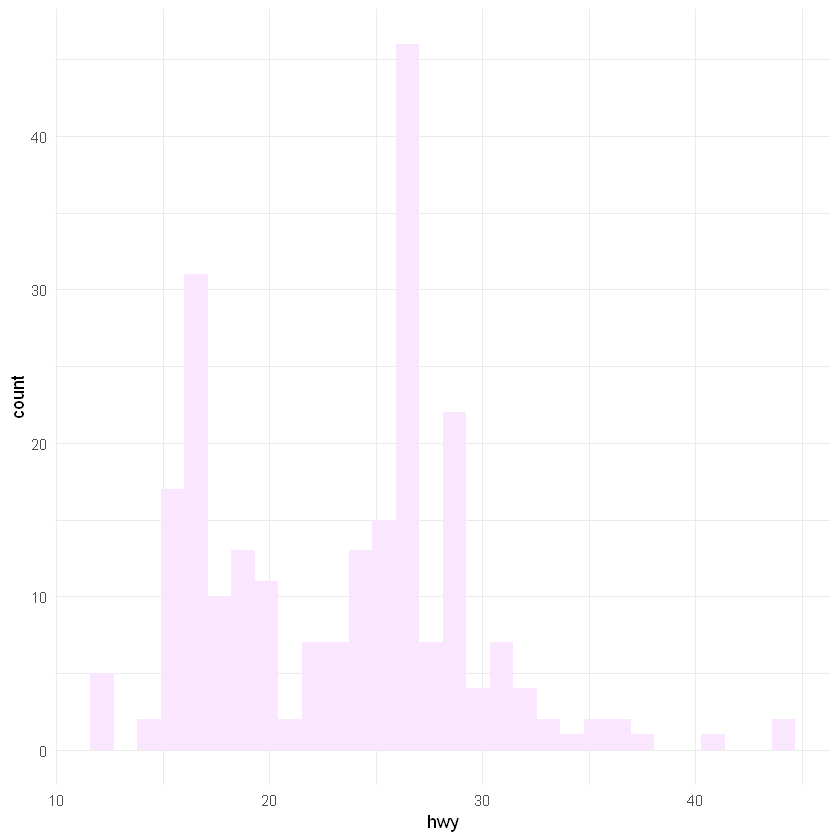

In [2]:
library(ggplot2)

ggplot(dat) +
  aes(x = hwy) +
  geom_histogram(bins = 30L, fill = "#fae6ff") +
  theme_minimal()

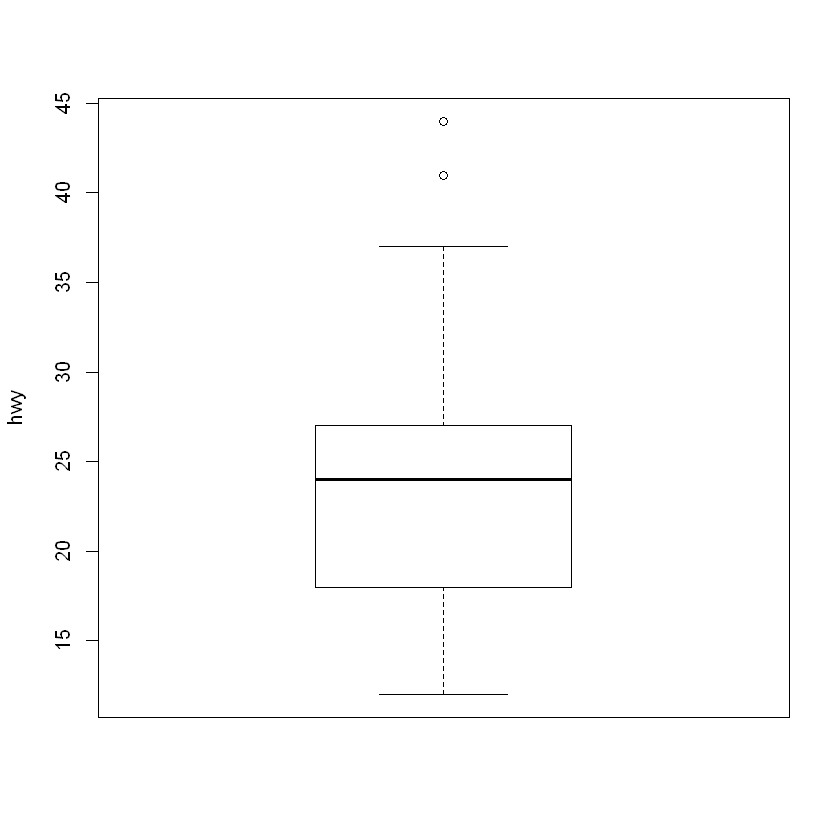

In [19]:
boxplot(dat$hwy,
  ylab = "hwy"
)

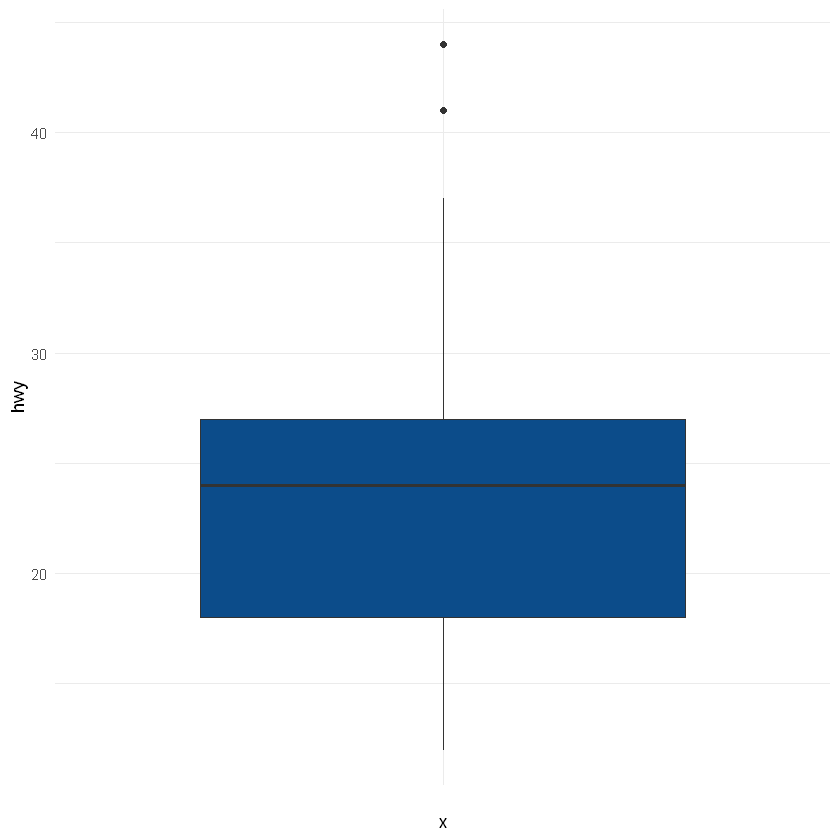

In [20]:
ggplot(dat) +
  aes(x = "", y = hwy) +
  geom_boxplot(fill = "#0c4c8a") +
  theme_minimal()

It is also possible to extract the values of the potential outliers based on the IQR criterion thanks to the boxplot.stats()$out

In [3]:
as <-c(1,2,3,4,6,7)
which(as,6)

ERROR: Error in which(as, 6): argument to 'which' is not logical


In [21]:
boxplot.stats(dat$hwy)$out

[1] 44 44 41

**which() function it is possible to extract the row number corresponding to these outliers**

In [22]:
out <- boxplot.stats(dat$hwy)$out
out_ind <- which(dat$hwy %in% c(out))
out_ind

[1] 213 222 223

With this information you can now easily go back to the specific rows in the dataset to verify them, or print all variables for these outliers

In [23]:
dat[out_ind, ]

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


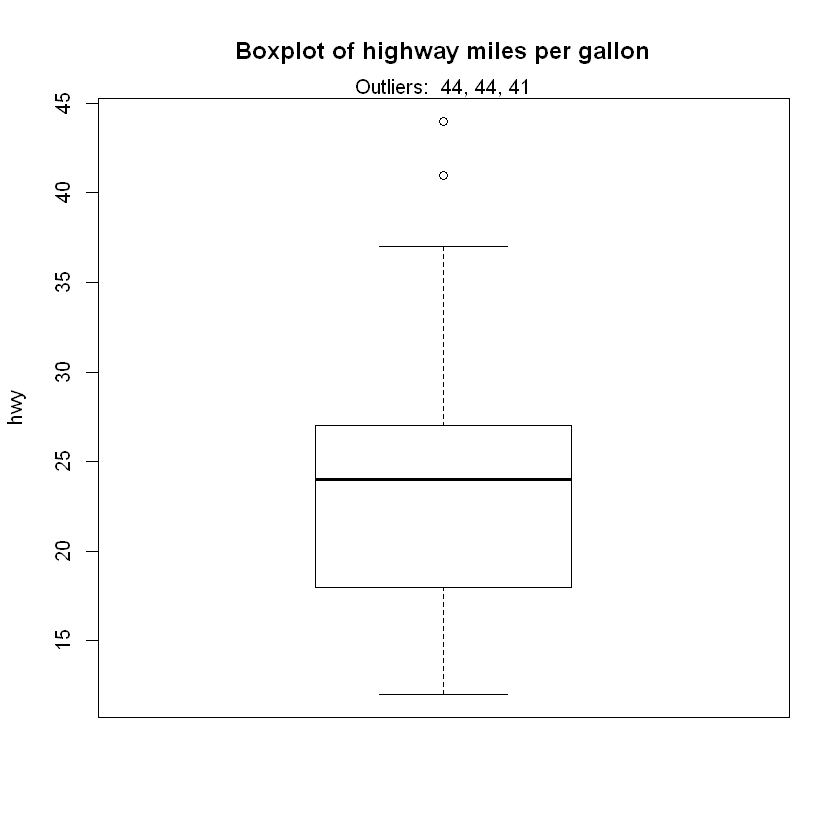

In [24]:
boxplot(dat$hwy,
  ylab = "hwy",
  main = "Boxplot of highway miles per gallon"
)
mtext(paste("Outliers: ", paste(out, collapse = ", ")))

It is also possible to print the values of the outliers directly on the boxplot with the mtext() function

#### Percentiles
This method of outliers detection is based on the percentiles. With the percentiles method, all observations that lie outside the interval formed by the 2.5 and 97.5 percentiles will be considered as potential outliers. Other percentiles such as the 1 and 99, or the 5 and 95 percentiles can also be considered to construct the interval.

The values of the lower and upper percentiles (and thus the lower and upper limits of the interval) can be computed with the quantile() function

In [25]:
lower_bound <- quantile(dat$hwy, 0.025)
lower_bound

2.5% 
  14

In [26]:
upper_bound <- quantile(dat$hwy, 0.975)
upper_bound

97.5% 
35.175

According to this method, all observations below 14 and above 35.175 will be considered as potential outliers. The row numbers of the observations outside of the interval can then be extracted with the which() function

In [27]:
outlier_ind <- which(dat$hwy < lower_bound | dat$hwy > upper_bound)
outlier_ind

[1]  55  60  66  70 106 107 127 197 213 222 223

In [28]:
dat[outlier_ind, "hwy"]

hwy
12
12
12
12
36
36
12
37
44
44


In [29]:
dat[outlier_ind, ]

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact
honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact
jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact


There are 11 potential outliers according to the percentiles method. To reduce this number, you can set the percentiles to 1 and 99

In [30]:
lower_bound <- quantile(dat$hwy, 0.01)
upper_bound <- quantile(dat$hwy, 0.99)

outlier_ind <- which(dat$hwy < lower_bound | dat$hwy > upper_bound)

dat[outlier_ind, ]

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


# Confusion Matrix

A confusion matrix in R is a table that will categorize the predictions against the actual values. It includes two dimensions, among them one will indicate the predicted values and another one will represent the actual values.

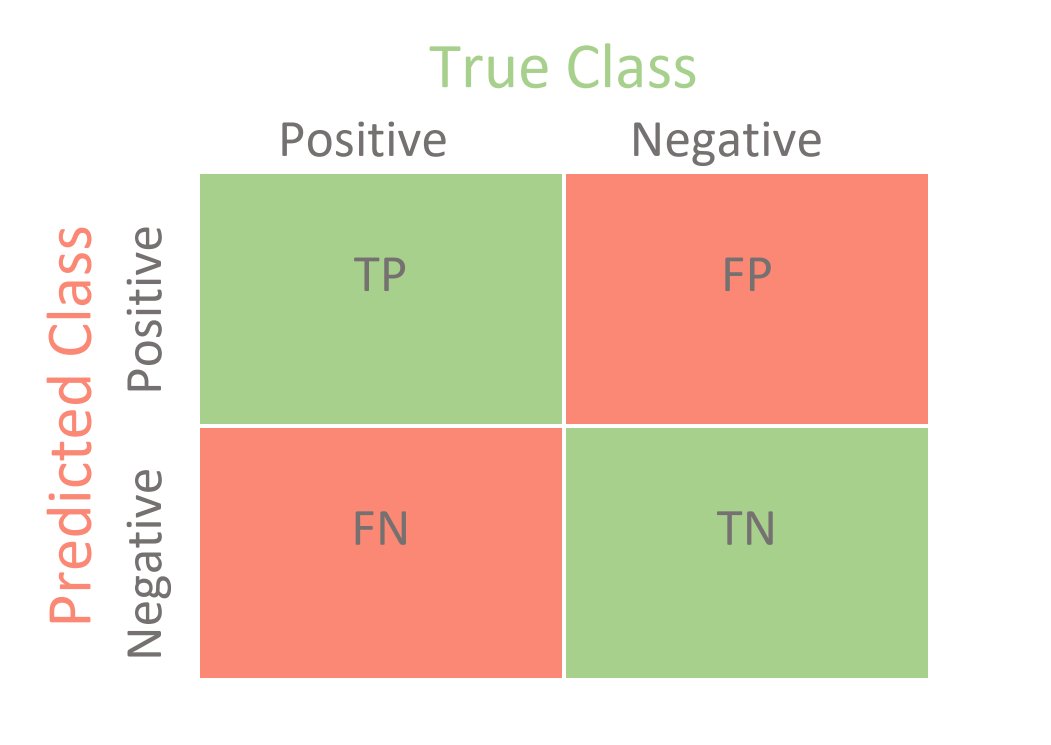

In [31]:
library("IRdisplay")
display_png(file='confusion.png',width = 700,height=200)

* True Positive (TN) – This is correctly classified as the class if interest / target.
* True Negative (TN) – This is correctly classified as not a class of interest / target.
* False Positive (FP) – This is wrongly classified as the class of interest / target.
* False Negative (FN) – This is wrongly classified as not a class of interest / target.

In [32]:
library(caret)
 
#Creates vectors having data points
expected_value <- factor(c(1,0,1,0,1,1,1,0,0,1))
predicted_value <- factor(c(1,0,0,1,1,1,0,0,0,1))
 
#Creating confusion matrix
example <- confusionMatrix(data=predicted_value, reference = expected_value)
 
#Display results 
example

Loading required package: lattice


Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 3 2
         1 1 4
                                          
               Accuracy : 0.7             
                 95% CI : (0.3475, 0.9333)
    No Information Rate : 0.6             
    P-Value [Acc > NIR] : 0.3823          
                                          
                  Kappa : 0.4             
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.7500          
            Specificity : 0.6667          
         Pos Pred Value : 0.6000          
         Neg Pred Value : 0.8000          
             Prevalence : 0.4000          
         Detection Rate : 0.3000          
   Detection Prevalence : 0.5000          
      Balanced Accuracy : 0.7083          
                                          
       'Positive' Class : 0               
                                          